# 1. Data Cleaning Notebook

This notebook contains **basic data cleaning steps that are not included in the NLP preprocessing procedure**. We will also be doing **EDA** on **non-corpus data** columns here.

The purpose of this is to fix up the provided `twitter_data.csv` and adjust it for our classification use. **The cleaned dataframe will be pickled for future use across all notebooks.**

In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('bmh')
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

In [3]:
df = pd.read_csv('twitter_data.csv', index_col=0)

In [4]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [6]:
df['class'].unique()

array([2, 1, 0])

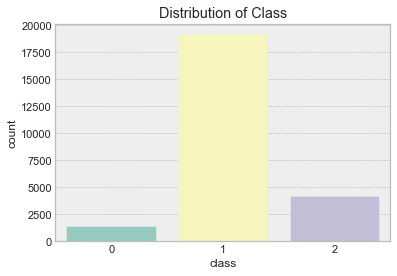

In [22]:
sns.countplot(df['class'], palette='Set3').set_title('Distribution of Class')

plt.savefig('visualizations/first_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [8]:
# df['class'].sum() / len(df['class'])

## Creating new column `label` for hate speech binary predictor

In [9]:
df['labels'] = df['class'].replace(1, 2)

In [10]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,2
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,2
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,2
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,2


In [11]:
df.labels.unique()

array([2, 0])

In [12]:
# changing hate speech to 1 and not hate speech to 0
df['labels'] = df['labels'].replace(0, 1)
df['labels'] = df['labels'].replace(2, 0)

In [13]:
df.labels.unique()

array([0, 1])

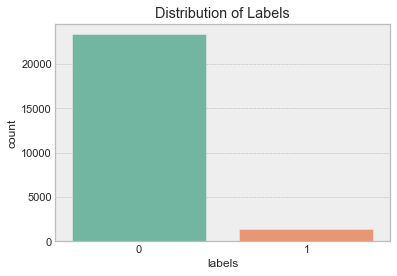

In [23]:
sns.countplot(df['labels'], palette='Set2').set_title('Distribution of Labels')

plt.savefig('visualizations/final_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [16]:
# we can see that only 5.7% of the data is actual hate speech
df['labels'].sum() / len(df['labels'])

0.05770084332001776